## Final Project Laboratorium Machine Learning - Group GaNi
#### Anggota Kelompok:
1. Daniel Andrew Ketaren	(211402062)
2. Sarmida Uli Sinaga		(211402071)
3. Muhammad Hatta Abdillah	(211402110)
4. Luthfi Muzhaffar	Lubis	(211402119)

#### Dataset : Singapore Housing & Development Board (HBD) Resale Price 
Link :  https://drive.google.com/file/d/15Xwkyf5IkQiCoNP1xbLgNbOKwfNi2P73/view

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score
from scipy import stats

# A. Data cleansing

Ketentuan yang harus diikuti dalam melakukan filtering data di Dataset Singapore HDB Resale Price

1. Data dari kedua dataset disatukan
2. Data yang digunakan hanya dalam rentang 2016 - 2020, maka data selain rentang waktu 2015-2016 akan dihilangkan
3. Memperbaiki format kolom yang salah
4. Memperbaiki `missing values` dan `outlier` dengan cara cara yang tepat

Maka, langkah langkah yang harus dilakukan agar `filtering` data ini berjalan dengan baik, antara lain:

1. Melakukan penyatuan terhadap dua dataset yang diberikan sebelumnya, dengan tujuan agar kita dapat memanfaatkan kedua dataset dengan baik tanpa pemisahan
2. Melakukan `filtering` data dengan ketentuan kita hanya akan memakai data dari tahun 2016-2020
3. Melihat data setelah di`filter`
4. Menentukan kolom yang memiliki format yang salah
5. Mengubah kolom dengan format kolom yang salah itu tadi ke dalam format yang benar
6. Melihat data setelah diformat
7. Melihat `missing values` pada data
8. Jikalau ada `missing values` pada data, maka akan diimplementasikan metode metode yang cocok diterapkan untuk menangani `missing values`-nya
9. Melihat data setelah penanganan `missing values`
10. Mengecek `sum`, `min`, `max` dari setiap kolom pada dataset yang dapat dikalkulasikan
11. Melihat posibilitas data ada yang `outlier` atau tidak
12. Melihat data yang `outlier`
13. Menentukan apakah data yang `outlier` ini memanglah berdasar ataukah merupakan kesalahan dari inputan
14. Mengimplementasikan kesimpulan dari poin ke 13
15. Mengecek data yang duplikat
16. Menghapus data yang duplikat

### Data dari kedua dataset disatukan

In [2]:
csv1 = '2015-to-2016.csv'
csv2 = '2017-to-2020.csv'

df1 = pd.read_csv(csv1)
df2 = pd.read_csv(csv2)

df_combined = pd.concat([df1, df2], axis=0, ignore_index=True)

csv_combined = '2016-to-2020.csv'
df_combined.to_csv(csv_combined, index=False)

### Membaca data yang telah dicombine

In [3]:
df = pd.read_csv(csv_combined)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
117522,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66 years 03 months,440000.0
117523,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65 years 06 months,458000.0
117524,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66 years 04 months,490000.0
117525,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66 years 03 months,558000.0


### Memfilter data hanya 2016 sampai 2020 saja

In [4]:
# Penghapusan data
tahun_target = ['2015']

for i in range(len(df)):
    tahun = df['month'][i].split("-", 1)[0]
    
    if tahun in tahun_target:
        df = df.drop(i)

# Menghapus indeks data 2015
df = df.reset_index(drop=True)

# Kondisi data setelah data 2015 dihapus
df.to_csv('2016-to-2020.csv', index=False)

### Melihat data yang sudah difilter

In [5]:
csv_combine = '2016-to-2020.csv'

df = pd.read_csv(csv_combine)

df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2016-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,62,230000.0
1,2016-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,61,240000.0
2,2016-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,69,276000.0
3,2016-01,ANG MO KIO,3 ROOM,560,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1980,63,280000.0
4,2016-01,ANG MO KIO,3 ROOM,258,ANG MO KIO AVE 4,01 TO 03,73.0,New Generation,1977,60,285000.0
...,...,...,...,...,...,...,...,...,...,...,...
99742,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66 years 03 months,440000.0
99743,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65 years 06 months,458000.0
99744,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66 years 04 months,490000.0
99745,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66 years 03 months,558000.0


### Menentukan kolom yang memiliki format yang salah

In [6]:

# Perubahan pada remaining_lease agar data yang memiliki format yy years mm months berubah menjadi yy saja
def transform_remaining_lease(lease):
    if pd.notna(lease):
        if lease.isdigit():
            return int(lease)
        elif 'year' in lease:
            years = int(lease.split()[0])
            return years
        elif 'month' in lease:
            years, months = map(int, lease.split()[:2])
            if months <= 6:
                return years
            else:
                return years + 1
    else:
        return np.nan

# Mengganti nilai pada kolom remaining_lease dengan nilai yang baru
df['remaining_lease'] = df['remaining_lease'].apply(transform_remaining_lease)

# Menampilkan hasil
print(df['remaining_lease'])


0        62
1        61
2        69
3        63
4        60
         ..
99742    66
99743    65
99744    66
99745    66
99746    66
Name: remaining_lease, Length: 99747, dtype: int64


### Melihat data setelah remaining_lease diubah

In [7]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2016-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,62,230000.0
1,2016-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,61,240000.0
2,2016-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,69,276000.0
3,2016-01,ANG MO KIO,3 ROOM,560,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1980,63,280000.0
4,2016-01,ANG MO KIO,3 ROOM,258,ANG MO KIO AVE 4,01 TO 03,73.0,New Generation,1977,60,285000.0
...,...,...,...,...,...,...,...,...,...,...,...
99742,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66,440000.0
99743,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65,458000.0
99744,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66,490000.0
99745,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66,558000.0


### Melihat missing values pada data


In [8]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

Dikarenakan tidak ada missing values yang terlihat pada dataset, maka kita tidak perlu melakukan penanganan terhadap missing values

### Mengecek sum, min, max, dan lain lain dari setiap kolom pada dataset yang dapat dikalkulasikan


In [9]:
df.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
count,99747.000000,99747.000000,99747.000000,9.974700e+04
mean,97.552090,1993.602635,74.192216,4.392237e+05
std,24.251437,12.570580,12.512908,1.506651e+05
min,31.000000,1966.000000,45.000000,1.400000e+05
25%,81.000000,1984.000000,65.000000,3.300000e+05
50%,95.000000,1993.000000,74.000000,4.100000e+05
75%,112.000000,2002.000000,83.000000,5.100000e+05
max,259.000000,2019.000000,97.000000,1.258000e+06


### Melihat probabilitas data ada yang outlier atau tidak

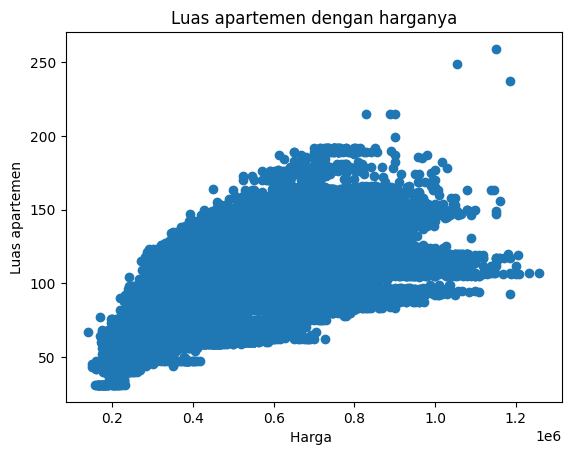

In [10]:
plt.scatter(df['resale_price'], df['floor_area_sqm'])
plt.title('Luas apartemen dengan harganya')
plt.xlabel('Harga ')
plt.ylabel('Luas apartemen')
plt.show()

Maka dapat dilihat bahwa ada sekitar 3 data yang sangat jauh dari kelompoknya, dan 3 data tersebut ada di kanan atas, yang memiliki arti harga yang mahal dan memiliki luas apartemen yang besar. Maka, yang harus dilakukan selanjutnya adalah melihat data yang diduga outliers tersebut, apakah outlier disebabkan kesalahan inputan atau memang ditetapkan harganya demikian.

Kita akan melakukan pengecekan data yang outlier dengan menggunakan metode IQR (Interquartile Range) atau rentang akar kuartil dari sekumpulan data. IQR digunakan untuk membantu menarik kesimpulan tentang data.

In [11]:
# Menghitung nilai IQR pada floor_area_sqm
Q1 = df['floor_area_sqm'].quantile(0.25) #kuartil 1
Q3 = df['floor_area_sqm'].quantile(0.75) #kuartil 3
IQR = Q3 - Q1

print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('IQR wheel base = ', IQR)

Q1 =  81.0
Q3 =  112.0
IQR wheel base =  31.0


In [12]:
# Memeriksa outlier seluruh kolom yang bertipekan int64 dan float64
for i in (df.columns):
    if(df[i].dtypes in ['int64', 'float64']):
        print(i, ' : ', df[i].dtypes)

        Q1 = df[i].quantile(0.25) #kuartil 1
        print('Q1 = ', Q1)

        Q3 = df[i].quantile(0.75) #kuartil 3
        print('Q3 = ', Q3)

        IQR = Q3 - Q1
        print('IQR wheel base = ', IQR)

        nilai_minimum = df[i].min()
        nilai_maximum = df[i].max()

        minimum_IQR = Q1 - 3.5 * IQR
        maximum_IQR = Q3 + 3.5 * IQR

        if(nilai_minimum < minimum_IQR):
            print('Low outlier ditemukan <', minimum_IQR)
            print('Indeks dari low outlier : ', list(df[df[i] < minimum_IQR].index)) # indeks low outlier

        if(nilai_maximum > maximum_IQR):
            print('High outlier ditemukan >', maximum_IQR)
            print('Indeks dari high outlier : ', list(df[df[i] > maximum_IQR].index)) # indeks high outlier

        print('\n')

floor_area_sqm  :  float64
Q1 =  81.0
Q3 =  112.0
IQR wheel base =  31.0
High outlier ditemukan > 220.5
Indeks dari high outlier :  [18710, 39066, 55149]


lease_commence_date  :  int64
Q1 =  1984.0
Q3 =  2002.0
IQR wheel base =  18.0


remaining_lease  :  int64
Q1 =  65.0
Q3 =  83.0
IQR wheel base =  18.0


resale_price  :  float64
Q1 =  330000.0
Q3 =  510000.0
IQR wheel base =  180000.0
High outlier ditemukan > 1140000.0
Indeks dari high outlier :  [18710, 20702, 30227, 42616, 43102, 51200, 53879, 55149, 56633, 60304, 61219, 61816, 62223, 62720, 64497, 66332, 69160, 70382, 72887, 73137, 74371, 87678, 90515, 91489, 95378, 97851, 97853, 98838]




Maka dapat dilihat bahwa memang hanya resale_price dan floor_area_sqm sajalah yang memiliki outlier, dimana:

1. floor_area_sqm hanya memiliki high outlier, dan
2. resale_price hanya memiliki high outlier

Kemudian, kita akan melihat data yang outlier dari masing masing kolom yang memiliki outlier:

In [13]:
# Melihat data high outlier pada kolom floor_area_sqm
df.iloc[[18710, 39066, 55149]]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
18710,2016-12,KALLANG/WHAMPOA,3 ROOM,57,JLN MA'MOR,01 TO 03,259.0,Terrace,1972,54,1150000.0
39066,2017-12,KALLANG/WHAMPOA,3 ROOM,65,JLN MA'MOR,01 TO 03,249.0,Terrace,1972,53,1053888.0
55149,2018-09,KALLANG/WHAMPOA,3 ROOM,41,JLN BAHAGIA,01 TO 03,237.0,Terrace,1972,52,1185000.0


Dari data yang ada diatas, kami menyimpulkan bahwa sebenarnya data floor_area_sqm yang tergolong high outlier bukan disebabkan oleh kesalahan inputan, namun memang adalah luas permeter yang sesuai dengan kondisi apartemen terrace pada umumnya. Maka tidak ada alasan untuk menghapus data tersebut.

Seperti yang diketahui, apatemen model terrace memang cenderung lebih luas dibandingkan apartemen model lain, hal ini disebabkan karena apartemen model ini memiliki halaman depan untuk bersantai seperti di rumah, sehingga semakin memperluas ukuran lantai.

In [14]:
# Melihat data high outlier pada kolom resale_price
df.iloc[[18710, 20702, 30227, 42616, 43102, 51200, 53879, 55149, 56633, 60304, 61219, 61816, 62223, 62720, 64497, 66332, 69160, 70382, 72887, 73137, 74371, 87678, 90515, 91489, 95378, 97851, 97853, 98838]]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
18710,2016-12,KALLANG/WHAMPOA,3 ROOM,57,JLN MA'MOR,01 TO 03,259.0,Terrace,1972,54,1150000.0
20702,2017-02,BISHAN,5 ROOM,273B,BISHAN ST 24,40 TO 42,120.0,DBSS,2011,93,1180000.0
30227,2017-07,QUEENSTOWN,EXECUTIVE,148,MEI LING ST,19 TO 21,156.0,Apartment,1995,77,1160000.0
42616,2018-03,CENTRAL AREA,5 ROOM,1B,CANTONMENT RD,37 TO 39,107.0,Type S2,2011,91,1145000.0
43102,2018-03,KALLANG/WHAMPOA,5 ROOM,7,BOON KENG RD,40 TO 42,117.0,DBSS,2011,91,1150000.0
51200,2018-07,QUEENSTOWN,EXECUTIVE,148,MEI LING ST,19 TO 21,149.0,Apartment,1995,76,1150000.0
53879,2018-08,TOA PAYOH,5 ROOM,139A,LOR 1A TOA PAYOH,40 TO 42,117.0,DBSS,2012,92,1160888.0
55149,2018-09,KALLANG/WHAMPOA,3 ROOM,41,JLN BAHAGIA,01 TO 03,237.0,Terrace,1972,52,1185000.0
56633,2018-10,CENTRAL AREA,5 ROOM,1D,CANTONMENT RD,40 TO 42,106.0,Type S2,2011,91,1168000.0
60304,2018-12,BUKIT MERAH,5 ROOM,9A,BOON TIONG RD,37 TO 39,112.0,Improved,2016,96,1150000.0


Tidak menghapus data tersebut juga didasari pada sebagian besar data yang diduga outlier pada kolom resale_price tersebut termasuk dalam golongan yang memiliki ruangan yang banyak, didominasi oleh 5 room, dan sebagian lainnya termasuk pada tipe eksekutif. Maka tidak heran jikalau harganya tinggi.

Kesimpulan dari mencari probabilitas data outlier ini adalah bahwa data data yang ditemukan terindikasi outlier ternyata bukanlah merupakan data yang mengalami kesalahan penulisan, melainkan adalah data sebenarnya dan masih terlihat masuk akal untuk nilainya, hal itu yang membuat kami tidak memiliki niatan yang mendesak untuk menghapus data data yang terindikasi outlier tersebut.

### Mengecek data yang duplikat

Mengecek data duplikat ini berfungsi agar mengurangi ukuran dari dataset dan meningkatkan kinerja analisis data agar lebih akurat.

Cara mengecek jumlah data yang duplikat adalah dengan memakai fungsi .duplicated().sum()

In [15]:
df.duplicated().sum()

246

Terdapat 246 data duplikat di dalam dataset ini, maka dari itu, kita akan melihat dulu, sebenaranya data apa saja yang duplikat tersebut.

In [16]:
# Mencari duplicated
tes = df.duplicated()

def filter_true_indices(series):
    return series.index[series].tolist()

# Menggunakan fungsi untuk mendapatkan indeks yang True
true_indices = filter_true_indices(tes)

df.iloc[true_indices]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
416,2016-01,CLEMENTI,3 ROOM,450,CLEMENTI AVE 3,04 TO 06,82.0,New Generation,1980,63,410000.0
897,2016-01,SENGKANG,4 ROOM,436D,FERNVALE RD,13 TO 15,96.0,Model A,2010,93,455000.0
2041,2016-02,SEMBAWANG,4 ROOM,467,ADMIRALTY DR,07 TO 09,102.0,Premium Apartment,2001,84,365000.0
2517,2016-03,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,63,340000.0
5529,2016-04,TAMPINES,3 ROOM,830,TAMPINES ST 82,01 TO 03,70.0,Simplified,1986,68,315000.0
...,...,...,...,...,...,...,...,...,...,...,...
94787,2020-07,YISHUN,5 ROOM,426D,YISHUN AVE 11,07 TO 09,112.0,Improved,2015,93,505000.0
95171,2020-08,BUKIT MERAH,2 ROOM,45,TELOK BLANGAH DR,04 TO 06,45.0,Improved,1976,54,210000.0
95606,2020-08,HOUGANG,3 ROOM,115,HOUGANG AVE 1,01 TO 03,67.0,New Generation,1981,60,260000.0
95865,2020-08,JURONG WEST,5 ROOM,183D,BOON LAY AVE,04 TO 06,112.0,Improved,2015,93,490000.0


Setelah benar benar yakin akan menghapus dataset tersebut, maka kita akan menghapus data diatas dengan menggunakan fungsi drop

# B. Exploratory Data Analysis (EDA)

Adapun insights yang dapat diambil meliputi: 
1. Properti pada daerah mana saja yang memiliki nilai sesuai (worth it) 
2. Faktor apa saja yang paling memengaruhi tinggi rendahnya harga properti 
3. Pergolakan trend serta volume transaksi properti dari tahun 2016 sampai tahun 2020. 

### Properti pada daerah mana saja yang memiliki nilai sesuai (worth it)

Adapun ketentuan daerah yang paling worth it disini merujuk dari indikator:

1. Mahal atau tidaknya suatu apartemen di daerah tersebut
2. Luas atau tidaknya bangunan tersebut
3. Berapa harga rata rata dari bangunan berdasarkan flat_typenya
4. Berapa harga rata rata dari bangunan berdasarkan flat_modelnya

Maka, pertama tama, kita akan melihat dulu kolom mana saja yang cocok untuk dijadikan indikator untuk menentukan daerah mana saja yang paling worth it.

In [17]:
# Melihat data
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2016-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,62,230000.0
1,2016-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,61,240000.0
2,2016-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,69,276000.0
3,2016-01,ANG MO KIO,3 ROOM,560,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1980,63,280000.0
4,2016-01,ANG MO KIO,3 ROOM,258,ANG MO KIO AVE 4,01 TO 03,73.0,New Generation,1977,60,285000.0
...,...,...,...,...,...,...,...,...,...,...,...
99742,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66,440000.0
99743,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65,458000.0
99744,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66,490000.0
99745,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66,558000.0


Dari data di atas, kita bisa memakai beberapa kolom antara lain:

1. Resale price sebagai indikator besaran harga jual kembali
2. Flat type untuk menentukan seberapa pengaruh flat_type terhadap harga jual kembali
3. Town sebagai nama kota
4. Floor_area_sqm sebagai indikator luas apartemennya
5. Flat_model sebagai penanda apartemen tersebut bagaimana modelnya
6. resale_price sebagai harga dari apartemen

#### Melihat persebaran harga apartemen berdasarkan harga resale_price dan luasnya

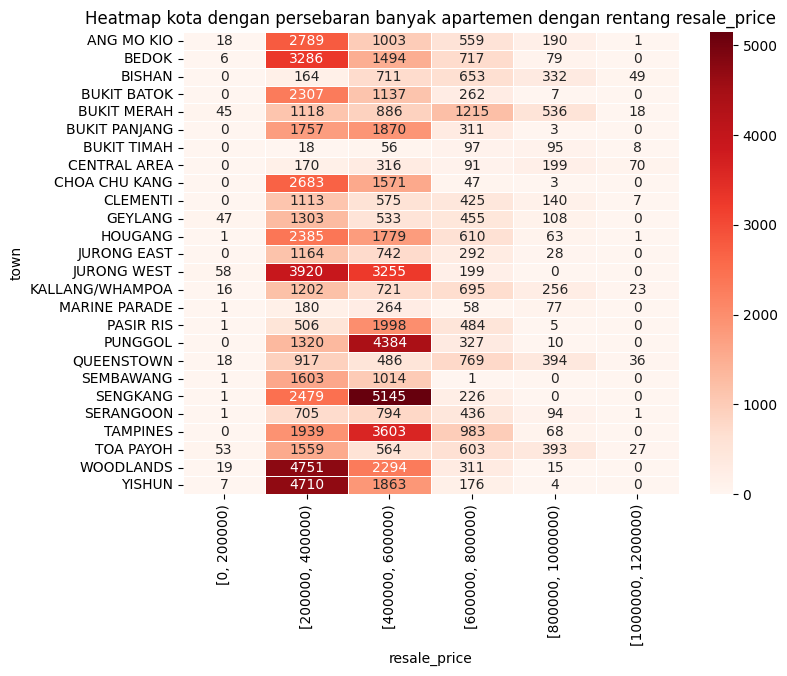

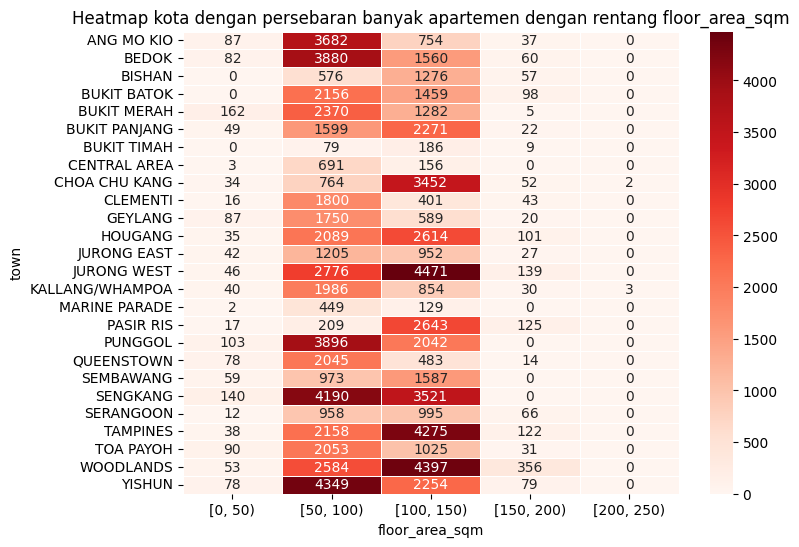

In [18]:
# Membuat bins untuk resale_price
bins = pd.cut(df['resale_price'], bins=range(0, 1400000, 200000), right=False)

# Membuat tabel silang dengan pd.crosstab
data = pd.crosstab(df['town'], bins)

plt.figure(figsize=(8, 6))  # Ubah nilai tinggi gambar sesuai kebutuhan Anda
sns.heatmap(data,cmap='Reds',annot=True, fmt='g', linewidths=.5)
plt.title("Heatmap kota dengan persebaran banyak apartemen dengan rentang resale_price")
plt.show()

# Membuat bins untuk floor_area_sqm
bins2 = pd.cut(df['floor_area_sqm'], bins=range(0, 260, 50), right=False)

# Membuat tabel silang dengan pd.crosstab
data2 = pd.crosstab(df['town'], bins2)

plt.figure(figsize=(8, 6))  # Ubah nilai tinggi gambar sesuai kebutuhan Anda
sns.heatmap(data2,cmap='Reds',annot=True, fmt='g', linewidths=.5)
plt.title("Heatmap kota dengan persebaran banyak apartemen dengan rentang floor_area_sqm")
plt.show()

Dapat dilihat dari tabel ke 1, terdapat beberapa kesimpulan yang dapat diambil, antara lain:

1. Untuk apartemen dengan rentang harga resale_price dibawah 200000, cenderung sedikit dan sulit untuk ditemukan

2. Daerah Woodlands dan Yishun terdapat banyak sekali apartemen yang cukup murah dengan kisaran harga 200000 sampai 400000

3. Daerah Sengkang menempati urutan pertama sebagai daerah dengan jumlah apartemen berharga sedang terbanyak diantara daerah lain, dengan rentang harga 400000 sampai 600000

4. Bukit Merah merupakan daerah yang didominasi oleh apartemen berharga menengah ke atas.


Kemudian dilihat dari tabel ke 2, terdapat beberapa kesimpulan yang dapat diambil, antara lain:

1. Untuk apartemen ukuran kurang dari 50 sqm ada, namun tidak cukup banyak pilihan di hampir seluruh daerah, kecuali Bukit Merah dan Sengkang, itupun tetap dikategorikan rendah walau agak signifikan

2. Untuk apartemen berukuran antara 50-100 sqm, pilihan terbanyak terdapat di 5 daerah, yaitu Yishun (terbanyak), Sengkang, Punggol, Bedok, dan Ang Mo Kio

3. Untuk apartemen berukuran sedang (100-150 sqm), pilihan terbanyak terdapat di 3 daerah, yaitu Woodlands, Yishun, dan Jurong West

4. Adapula Woodlands juga mendominasi apartemen besar dengan ukuran antara 150-200 sqm

5. Untuk apartemen ukuran raksasa (200-250 sqm), tidak banyak dan tidak bisa didapati di semua daerah, hanya terdapat di Kallang dan Choa Chu Kang

Maka dapat disimpulkan :

Apabila pelanggan menginginkan apartemen yang murah, maka Woodlands dan Yishun adalah pilihan tepat, begitu juga dengan ketersediaan apartemen yang standar, Woodlands dan Yishun juga mendominasi. Maka Woodlands dan Yishun adalah daerah yang paling worth-it jikalau didasarkan pada harga dan luas area apartemen.



### Faktor apa saja yang paling memengaruhi tinggi rendahnya harga properti

Harga properti yang ada pada kolom resale_price, dapat divisualisasikan dengan kolom kolom lain untuk melihat keterkaitan antara kolom kolom tersebut dengan resale_price. Hal ini juga dapat membantu menemukan model yang tepat kedepannya.

Kolom kolom yang akan dicek antara lain pengaruhnya antara lain:

1. flat_type terhadap resale_price
2. floor_area terhadap resale_price
3. flat_model terhadap resale_price

Sebelum itu, kita akan membaca terlebih dahulu datanya

In [19]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2016-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,62,230000.0
1,2016-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,61,240000.0
2,2016-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,69,276000.0
3,2016-01,ANG MO KIO,3 ROOM,560,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1980,63,280000.0
4,2016-01,ANG MO KIO,3 ROOM,258,ANG MO KIO AVE 4,01 TO 03,73.0,New Generation,1977,60,285000.0
...,...,...,...,...,...,...,...,...,...,...,...
99742,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66,440000.0
99743,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65,458000.0
99744,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66,490000.0
99745,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66,558000.0


#### Pengaruh flat_type terhadap resale_price

Kali ini kita akan melihat bagaimana pengaruh dari Tipe Flat terhadap harga jual kembali:

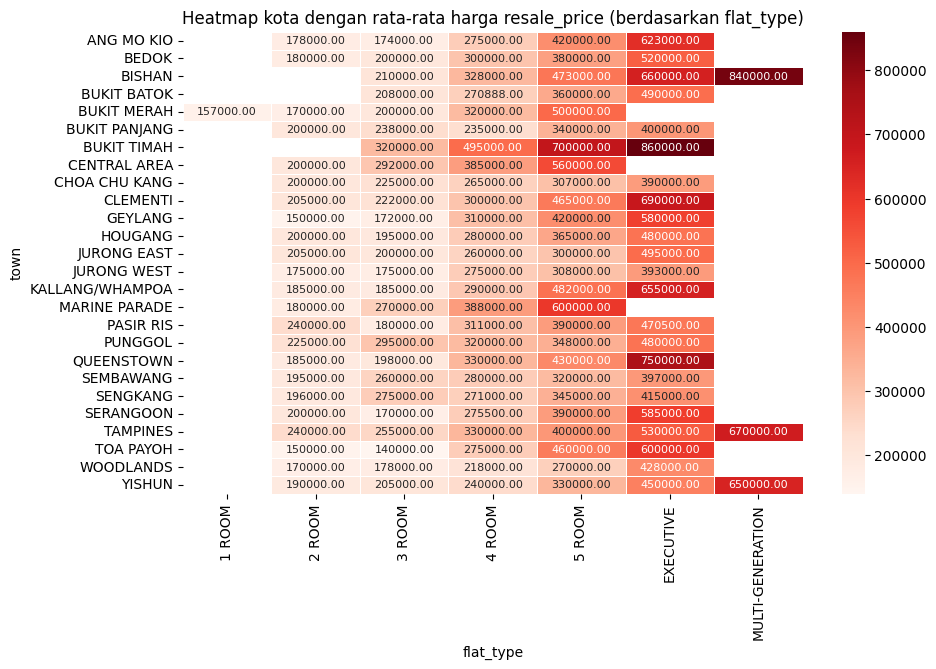

In [20]:
# Menentukan urutan kategori flat_type
flat_type_order = df.flat_type.unique()

# Menghitung rata-rata resale_price_per_sqm untuk setiap flat_type dan kota
average_price_per_flat_type = df.groupby(['town', 'flat_type'])['resale_price'].min().reset_index()

# Filter hanya flat_type yang ada dalam urutan yang telah ditentukan
average_price_per_flat_type = average_price_per_flat_type[average_price_per_flat_type['flat_type'].isin(flat_type_order)]

# Membuat cross-tabulation untuk heatmap dengan rata-rata
data_collab = pd.crosstab(average_price_per_flat_type['town'], average_price_per_flat_type['flat_type'], values=average_price_per_flat_type['resale_price'], aggfunc='mean')

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_collab, cmap='Reds', annot=True, fmt='.2f', linewidths=.5, annot_kws={'size': 8})
plt.title("Heatmap kota dengan rata-rata harga resale_price (berdasarkan flat_type)")
plt.show()

Dari sini dapat kita lihat, bahwa semakin besar jumlah ruangan, maka harga jual apartemen semakin tinggi, kemudian untuk tipe eksekutif dan multi generation, adalah tipe yang lebih tinggi nilai jualnya dibanding 1-5 ROOM.

Kesimpulannya adalah, tipe flat dapat mempengaruhi harga jual pada apartemen

#### Pengaruh floor_area terhadap resale_price

Kali ini kita akan melihat bagaimana pengaruh dari Luas Apartemen terhadap harga jual kembali:

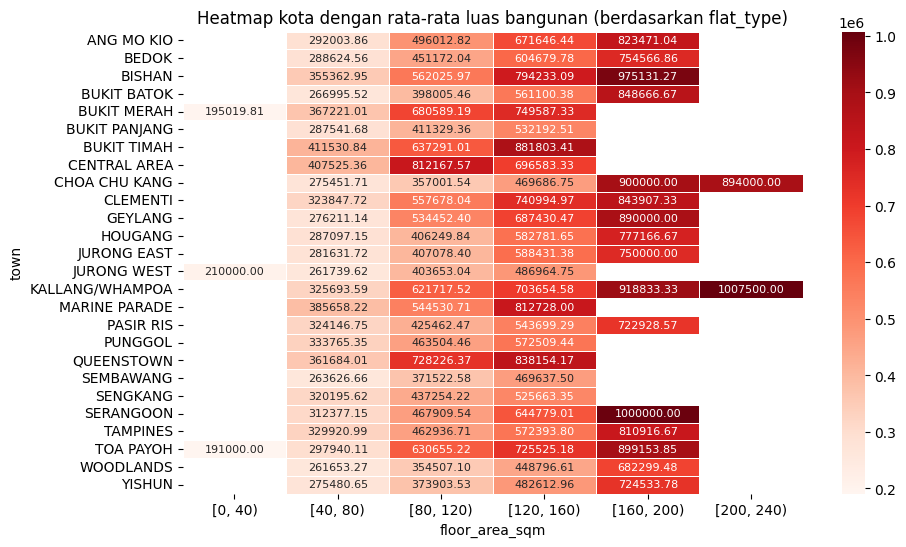

In [21]:
# Menentukan urutan kategori flat_type
floor_area_sqm_order = pd.cut(df['floor_area_sqm'], bins=range(0, 250, 40), right=False)

# Menghitung rata-rata resale_price_per_sqm untuk setiap flat_type dan kota
average_price_per_floor_area_sqm = df.groupby(['town', floor_area_sqm_order])['resale_price'].mean().reset_index()

# Membuat cross-tabulation untuk heatmap dengan rata-rata
data_collab = pd.crosstab(average_price_per_floor_area_sqm['town'], average_price_per_floor_area_sqm['floor_area_sqm'], values=average_price_per_floor_area_sqm['resale_price'], aggfunc='mean')

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_collab, cmap='Reds', annot=True, fmt='.2f', linewidths=.5, annot_kws={'size': 8})
plt.title("Heatmap kota dengan rata-rata luas bangunan (berdasarkan flat_type)")
plt.show()

Dari sini dapat kita lihat, bahwa semakin luas apartemen, maka harga jual apartemen semakin tinggi.

Kesimpulannya adalah, floor_area_sqm juga dapat mempengaruhi harga jual pada apartemen

#### Pengaruh flat_model terhadap resale_price

Kali ini kita akan melihat bagaimana pengaruh dari Model Flat terhadap harga jual kembali:

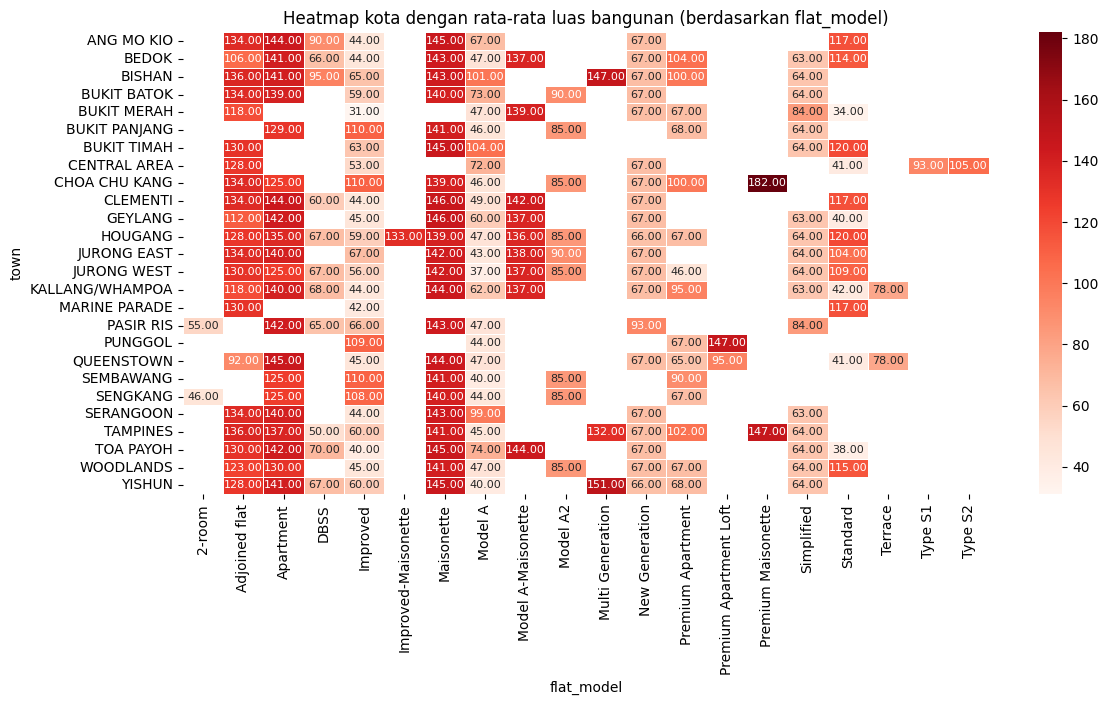

In [22]:
# Menentukan urutan kategori flat_type
flat_model_order = df.flat_model.unique()

# Menghitung rata-rata resale_price_per_sqm untuk setiap flat_type dan kota
average_price_per_flat_model = df.groupby(['town', 'flat_model'])['floor_area_sqm'].min().reset_index()

# Filter hanya flat_type yang ada dalam urutan yang telah ditentukan
average_price_per_flat_model = average_price_per_flat_model[average_price_per_flat_model['flat_model'].isin(flat_model_order)]

# Membuat cross-tabulation untuk heatmap dengan rata-rata
data_collab = pd.crosstab(average_price_per_flat_model['town'], average_price_per_flat_model['flat_model'], values=average_price_per_flat_model['floor_area_sqm'], aggfunc='mean')

# Membuat heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(data_collab, cmap='Reds', annot=True, fmt='.2f', linewidths=.5, annot_kws={'size': 8})
plt.title("Heatmap kota dengan rata-rata luas bangunan (berdasarkan flat_model)")
plt.show()

Dari sini dapat kita lihat, bahwa setiap model flat memiliki tingkat merahnya sendiri sendiri dan berbeda antara satu flat model dengan flat model lainnya.

Kesimpulannya adalah, flat_model juga dapat mempengaruhi harga jual pada apartemen

### Pergolakan trend serta volume transaksi properti dari tahun 2016 sampai tahun 2020. 

Harga properti yang ada pada kolom resale_price, dapat divisualisasikan dengan kolom kolom lain untuk melihat keterkaitan antara kolom kolom tersebut dengan resale_price. Hal ini juga dapat membantu menemukan model yang tepat kedepannya.

Kolom kolom yang akan dicek antara lain pengaruhnya antara lain:

1. flat_type terhadap resale_price
2. floor_area terhadap resale_price
3. flat_model terhadap resale_price

Sebelum itu, kita akan membaca terlebih dahulu datanya

In [23]:
# Persiapan data
df['datetime'] = pd.to_datetime(df['month'])
df['year'] = df['datetime'].dt.year

In [24]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,datetime,year
0,2016-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,62,230000.0,2016-01-01,2016
1,2016-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,61,240000.0,2016-01-01,2016
2,2016-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,69,276000.0,2016-01-01,2016
3,2016-01,ANG MO KIO,3 ROOM,560,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1980,63,280000.0,2016-01-01,2016
4,2016-01,ANG MO KIO,3 ROOM,258,ANG MO KIO AVE 4,01 TO 03,73.0,New Generation,1977,60,285000.0,2016-01-01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99742,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66,440000.0,2020-09-01,2020
99743,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65,458000.0,2020-09-01,2020
99744,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66,490000.0,2020-09-01,2020
99745,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66,558000.0,2020-09-01,2020


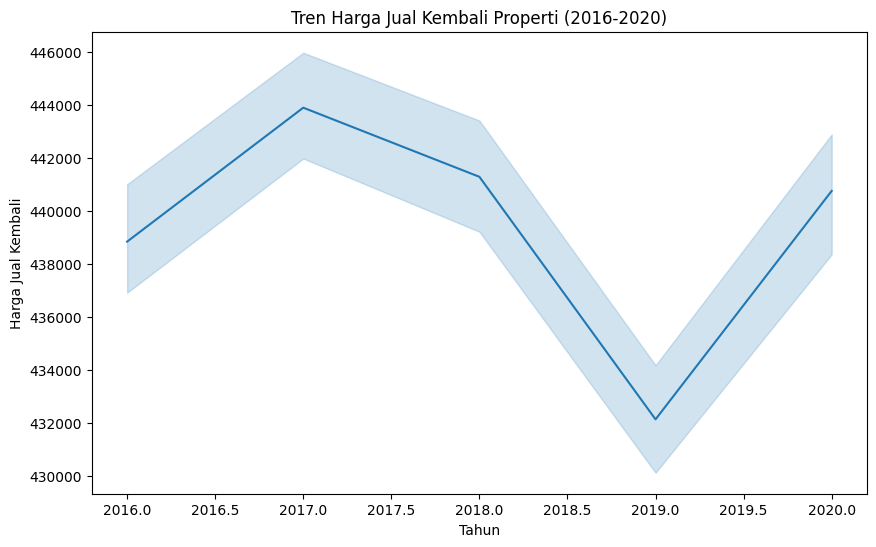

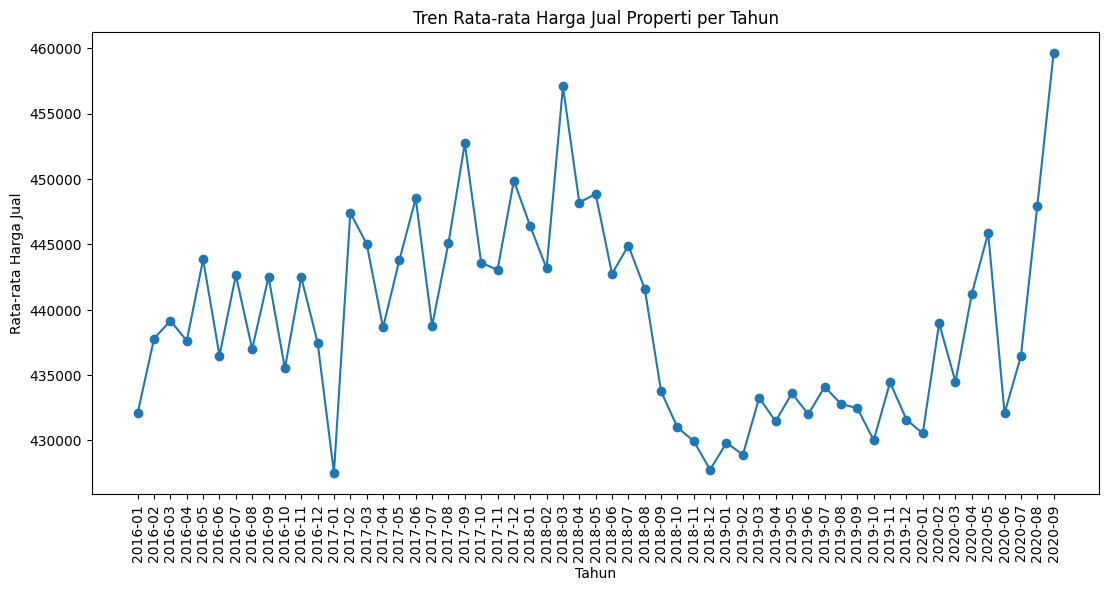

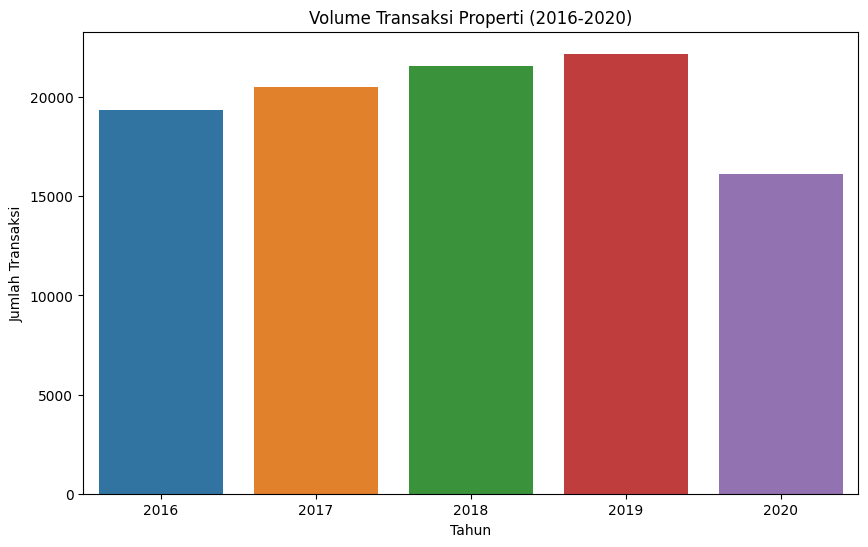

In [28]:
# Pergolakan tren harga jual kembali dari tahun 2016 hingga 2020
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='resale_price', data = df)
plt.title('Tren Harga Jual Kembali Properti (2016-2020)')
plt.xlabel('Tahun')
plt.ylabel('Harga Jual Kembali')
plt.show()

average_price_per_year = df.groupby('month')['resale_price'].mean()
plt.figure(figsize=(13, 6))
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o')
plt.title('Tren Rata-rata Harga Jual Properti per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga Jual')
plt.xticks(rotation = 90)
plt.show()

# Volume transaksi properti dari tahun 2016 hingga 2020
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data = df)
plt.title('Volume Transaksi Properti (2016-2020)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.show()